In [52]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os

In [53]:
df = sns.load_dataset("penguins")
df.head(7)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female


In [54]:
df["island"]

,island
0,Torgersen
1,Torgersen
2,Torgersen
3,Torgersen
4,Torgersen
...,...
339,Biscoe
340,Biscoe
341,Biscoe
342,Biscoe


In [55]:
type(df["island"])

pandas.core.series.Series

In [56]:
type(df)

pandas.core.frame.DataFrame

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [58]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [59]:
df.dtypes

,0
species,object
island,object
bill_length_mm,float64
bill_depth_mm,float64
flipper_length_mm,float64
body_mass_g,float64
sex,object


In [60]:
df.isnull().sum()

,0
species,0
island,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11


In [61]:
df["bill_length_mm"].mean()

np.float64(43.9219298245614)

In [62]:
med = df["bill_length_mm"].median()

In [63]:
df["bill_length_mm"] = df["bill_length_mm"].fillna(med)

In [64]:
num_cols=["bill_depth_mm", "flipper_length_mm","body_mass_g"]
for cols in num_cols:
  df[cols].fillna(df[cols].median(), inplace=True)

/tmp/ipython-input-2841328545.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[cols].fillna(df[cols].median(), inplace=True)


In [65]:
df.isnull().sum()

,0
species,0
island,0
bill_length_mm,0
bill_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,11


In [66]:
g=df['sex'].mode()[0]
df['sex'].fillna(g, inplace=True)

/tmp/ipython-input-406795296.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sex'].fillna(g, inplace=True)


In [67]:
df.isnull().sum()

,0
species,0
island,0
bill_length_mm,0
bill_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


In [68]:
df.duplicated().sum()

np.int64(0)

In [69]:
df.drop_duplicates(inplace=True)

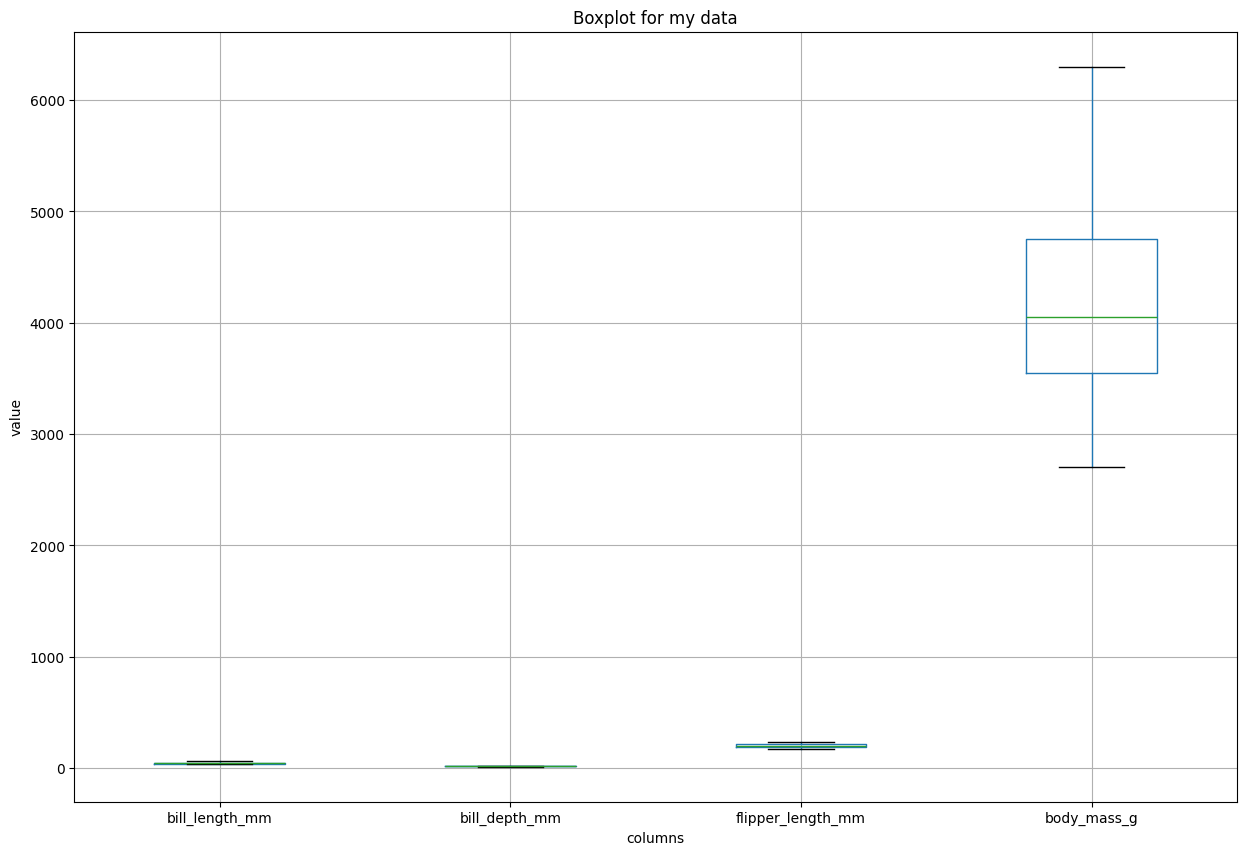

In [80]:
num_columns= df.select_dtypes(include=["int64","float64","int32"]).columns

plt.figure(figsize=(15,10))

df[num_columns].boxplot()
plt.title("Boxplot for my data")
plt.ylabel("value")
plt.xlabel("columns")
plt.grid(True)
plt.show()

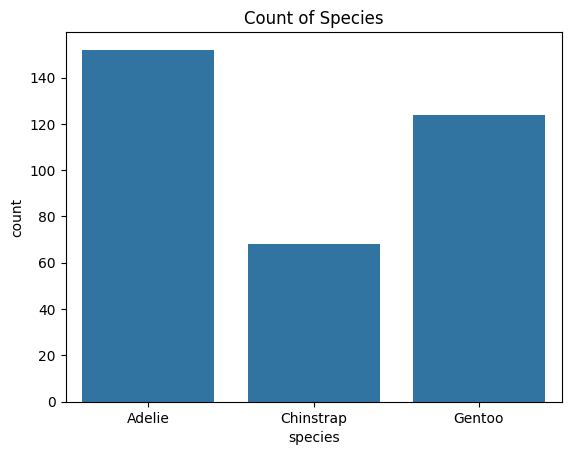

In [75]:
sns.countplot(x="species", data=df)
plt.title("Count of Species")
plt.show()

<Axes: ylabel='count'>

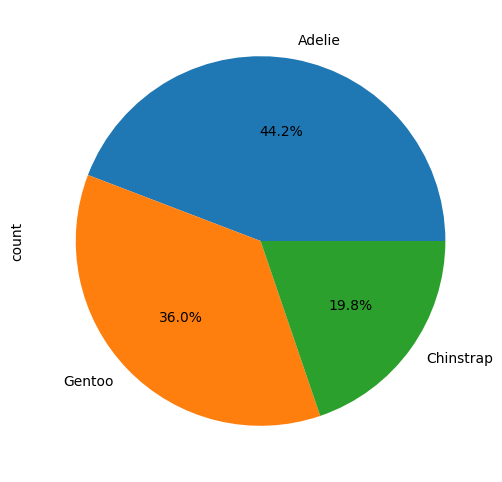

In [76]:
df['species'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))

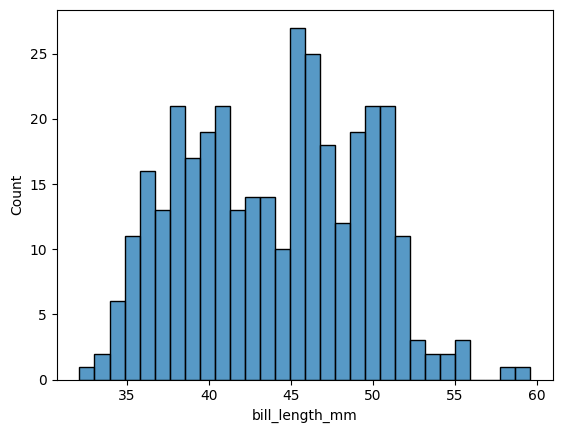

In [79]:
sns.histplot(df["bill_length_mm"],bins=30)
plt.show()
